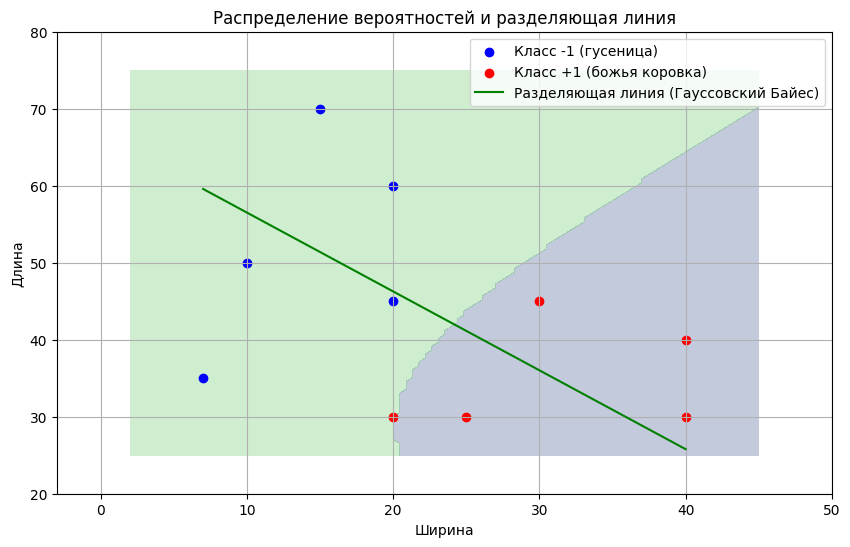

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Обучающие данные
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70],
                    [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Вычисление средних и дисперсий
mw1, ml1 = np.mean(x_train[y_train == 1], axis=0)
mw_1, ml_1 = np.mean(x_train[y_train == -1], axis=0)

sw1, sl1 = np.var(x_train[y_train == 1], axis=0, ddof=1)
sw_1, sl_1 = np.var(x_train[y_train == -1], axis=0, ddof=1)

# Создание сетки для визуализации
x_min, x_max = x_train[:, 0].min() - 5, x_train[:, 0].max() + 5
y_min, y_max = x_train[:, 1].min() - 5, x_train[:, 1].max() + 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Вычисление вероятностей для каждого класса на сетке
Z_0 = np.array([(-0.5 * (np.log(2 * np.pi * sw_1) + ((xi - mw_1) ** 2) / (2 * sw_1) +
                (yi - ml_1) ** 2 / (2 * sl_1))) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])
Z_0 = Z_0.reshape(xx.shape)

Z_1 = np.array([(-0.5 * (np.log(2 * np.pi * sw1) + ((xi - mw1) ** 2) / (2 * sw1) +
                (yi - ml1) ** 2 / (2 * sl1))) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])
Z_1 = Z_1.reshape(xx.shape)

# Построение графика
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_0 > Z_1, alpha=0.3)
plt.scatter(x_train[y_train == -1][:, 0], x_train[y_train == -1][:, 1], color='blue', label='Класс -1 (гусеница)')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], color='red', label='Класс +1 (божья коровка)')

# Построение разделяющей линии
x_line = np.linspace(x_min + 5, x_max - 5)
y_line = ((ml_1 - ml1) / (mw_1 - mw1)) * (x_line - mw_1) + ml_1

plt.plot(x_line, y_line , color='green', label='Разделяющая линия (Гауссовский Байес)')
plt.xlim(x_min-5,x_max+5)
plt.ylim(y_min-5,y_max+5)
plt.xlabel('Ширина')
plt.ylabel('Длина')
plt.title('Распределение вероятностей и разделяющая линия')
plt.legend()
plt.grid()
plt.show()


Доля правильных классификаций (Q):
Наивный Байес: 0.99
Логистическая регрессия (МНК): 0.98


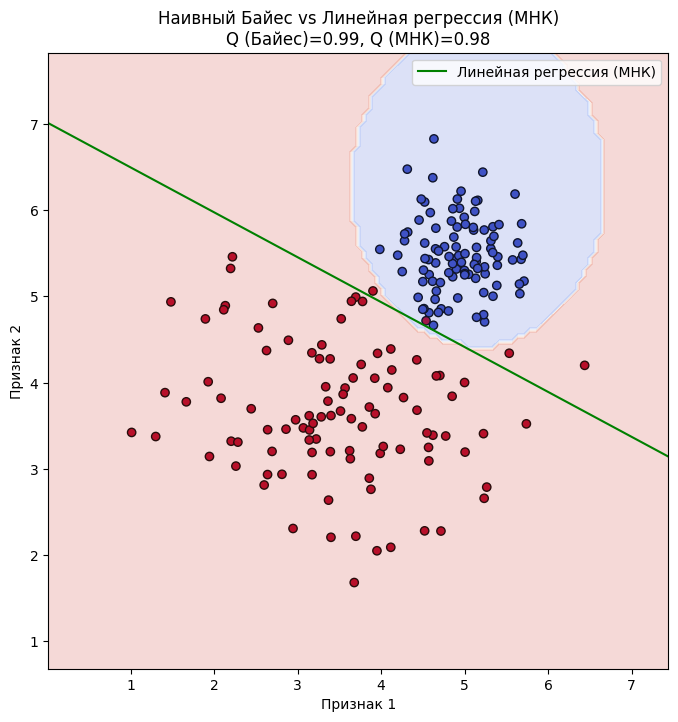

In [ ]:
# @title Наивный Байес vs Линейная регрессия (МНК)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

# Генерация данных с заданными матожиданиями и дисперсией
# Нули в дисперсии как раз показывают, что признаки независимы
X_class1 = np.random.multivariate_normal([5.0, 5.5], [[0.2, 0], [0, 0.2]], 100)
X_class2 = np.random.multivariate_normal([3.5, 3.5], [[0.8, 0], [0, 0.8]], 100)
X = np.vstack((X_class1, X_class2))
y = np.hstack((np.zeros(100), np.ones(100)))  # 0 - первый класс, 1 - второй класс

# Обучение наивного байесовского классификатора с гаусовским распределением
nb_model = GaussianNB()
nb_model.fit(X, y)

# Обучение линейной регрессии (МНК)
lr_model = LogisticRegression()
lr_model.fit(X, y)

# Подсчёт качества классификации (доли правильных предсказаний)
y_pred_nb = nb_model.predict(X)  # Предсказания Байеса
y_pred_lr = lr_model.predict(X)  # Предсказания МНК

q_nb = accuracy_score(y, y_pred_nb)  # Доля правильных предсказаний Байеса
q_lr = accuracy_score(y, y_pred_lr)  # Доля правильных предсказаний МНК

print(f"Доля правильных классификаций (Q):")
print(f"Наивный Байес: {q_nb:.2f}")
print(f"Логистическая регрессия (МНК): {q_lr:.2f}")

# Визуализация данных
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Классы")

# Построение границы решений Байеса
DecisionBoundaryDisplay.from_estimator(
    nb_model, X, cmap='coolwarm', alpha=0.2, ax=plt.gca(), response_method="predict"
)

# Построение разделяющей линии МНК
x_min, x_max = plt.xlim()
x_vals = np.linspace(x_min, x_max, 100)
y_vals = -(lr_model.coef_[0, 0] * x_vals + lr_model.intercept_[0]) / lr_model.coef_[0, 1]
plt.plot(x_vals, y_vals, color="green", label="Линейная регрессия (МНК)")

# Подписи и оформление
plt.title(f"Наивный Байес vs Линейная регрессия (МНК)\nQ (Байес)={q_nb:.2f}, Q (МНК)={q_lr:.2f}")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.show()